In [1]:
import tensorflow as tf

tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [4]:
#changing the working directory

%cd /content/gdrive/My Drive/Kaggle


/content/gdrive/My Drive/Kaggle


In [5]:
% pwd

#Check the present working directory using pwd command

'/content/gdrive/My Drive/Kaggle'

In [6]:
!ls


 0.2.0.zip				  Recommendation_df_test1.csv
 Apple-Twitter-Sentiment-DFE.csv	  Recommendation_df_test.csv
 apple-twitter-sentiment-texts.csv	  Recommendation_df_train1.csv
 Bitcoin_prediction_One_hot_encoded.csv   Recommendation_df_train.csv
 BitCoinPrice.csv			  sampleSubmission.csv
 Bitcoin_tweet_sentiment.csv		  sampleSubmission.csv.zip
 BTCUSD_1hr.csv				  sampleSubmission_v2.csv.zip
 BTCUSD_1min.csv			  saved_models
 BTCUSD_day.csv				  Song_Recommendation_Model.h5
 Credit_Card_Autoencoder_Model.h5	  submission.csv
 creditcard.csv				  test.csv
 decoder_layer.png			  test_embed_df.csv
 decoder.png				  test.tsv
 encoder_layer.png			  train.csv
 encoder.png				  train_embed_df.csv
 FastText				  train-sample.csv.zip
'Harry Potter 1.csv'			  train.tsv
'Harry Potter 2.csv'			  train_v2.csv
'Harry Potter 3.csv'			  transformer.png
 kaggle.json				  tweetsfinal1.csv
 Movie_Conversation.csv			  tweetsfinal2.csv
 movie_conversations.txt		  tweetsfinal3.csv
 Movie_Dialogue_Model1.h5		  tw

In [ ]:
# Tweets data from Oct 31 to Nov 9

import pandas as pd

header_list = ['Date', 'Tweet']
df1 = pd.read_csv('tweetsfinal1.csv', error_bad_lines=False, engine = 'python', names = header_list, header = None)
print(df1.shape)
df1.head()

Skipping line 845142: unexpected end of data


(845141, 2)


,Date,Tweet
0,Thu Nov 09 17:43:41 EST 2017,RT @Forbes: The Failure of SegWit2x Shows Bitc...
1,Thu Nov 09 17:43:40 EST 2017,RT @mindstatex: Lots of love from unknown mine...
2,Thu Nov 09 17:43:39 EST 2017,RT @FernandoHuamanX: Warning: Built-in Keylogg...
3,Thu Nov 09 17:43:39 EST 2017,RT @LevelNetwork: Join our telegram. All infor...
4,Thu Nov 09 17:43:39 EST 2017,"RT @realsheepwolf: $DIGAF: FLOAT=16M, THE ""ONL..."


In [ ]:
df1 = df1[::-1]
df1

,Date,Tweet
845140,Tue Oct 31 00:00:33 EDT 2017,Bitcoin Cash cheapest on Cryptopia BTC-market:...
845139,Tue Oct 31 00:00:34 EDT 2017,Wall Street Hedge Funds Rush to Cryptocurrenci...
845138,Tue Oct 31 00:00:35 EDT 2017,Bitcoin value: $6132.78
845137,Tue Oct 31 00:00:35 EDT 2017,The price of bitcoin on @coinbase is now 6136....
845136,Tue Oct 31 00:00:36 EDT 2017,Current Prices:\n\n1 Waves = 3.46762$\n1 Waves...
...,...,...
4,Thu Nov 09 17:43:39 EST 2017,"RT @realsheepwolf: $DIGAF: FLOAT=16M, THE ""ONL..."
3,Thu Nov 09 17:43:39 EST 2017,RT @LevelNetwork: Join our telegram. All infor...
2,Thu Nov 09 17:43:39 EST 2017,RT @FernandoHuamanX: Warning: Built-in Keylogg...
1,Thu Nov 09 17:43:40 EST 2017,RT @mindstatex: Lots of love from unknown mine...


In [ ]:
df1.isna().sum()

Date     0
Tweet    0
dtype: int64

In [ ]:
df1.dtypes

Date     object
Tweet    object
dtype: object

In [ ]:
# Extract date without timezone

df1['Date_new'] = df1.Date.str.slice(0,19) + df1.Date.str.slice(23, 28) 
df1

,Date,Tweet,Date_new
845140,Tue Oct 31 00:00:33 EDT 2017,Bitcoin Cash cheapest on Cryptopia BTC-market:...,Tue Oct 31 00:00:33 2017
845139,Tue Oct 31 00:00:34 EDT 2017,Wall Street Hedge Funds Rush to Cryptocurrenci...,Tue Oct 31 00:00:34 2017
845138,Tue Oct 31 00:00:35 EDT 2017,Bitcoin value: $6132.78,Tue Oct 31 00:00:35 2017
845137,Tue Oct 31 00:00:35 EDT 2017,The price of bitcoin on @coinbase is now 6136....,Tue Oct 31 00:00:35 2017
845136,Tue Oct 31 00:00:36 EDT 2017,Current Prices:\n\n1 Waves = 3.46762$\n1 Waves...,Tue Oct 31 00:00:36 2017
...,...,...,...
4,Thu Nov 09 17:43:39 EST 2017,"RT @realsheepwolf: $DIGAF: FLOAT=16M, THE ""ONL...",Thu Nov 09 17:43:39 2017
3,Thu Nov 09 17:43:39 EST 2017,RT @LevelNetwork: Join our telegram. All infor...,Thu Nov 09 17:43:39 2017
2,Thu Nov 09 17:43:39 EST 2017,RT @FernandoHuamanX: Warning: Built-in Keylogg...,Thu Nov 09 17:43:39 2017
1,Thu Nov 09 17:43:40 EST 2017,RT @mindstatex: Lots of love from unknown mine...,Thu Nov 09 17:43:40 2017


In [ ]:
import pandas as pd
df1['Date_new'] = pd.to_datetime(df1['Date_new'])

In [ ]:
df1.dtypes

Date                object
Tweet               object
Date_new    datetime64[ns]
dtype: object

In [ ]:
df_final = df1[(df1['Date_new'] > 'Tue Oct 31 00:00:00 2017') & (df1['Date_new'] < 'Tue Oct 31 23:59:00 2017')]
df_final

,Date,Tweet,Date_new
845140,Tue Oct 31 00:00:33 EDT 2017,Bitcoin Cash cheapest on Cryptopia BTC-market:...,2017-10-31 00:00:33
845139,Tue Oct 31 00:00:34 EDT 2017,Wall Street Hedge Funds Rush to Cryptocurrenci...,2017-10-31 00:00:34
845138,Tue Oct 31 00:00:35 EDT 2017,Bitcoin value: $6132.78,2017-10-31 00:00:35
845137,Tue Oct 31 00:00:35 EDT 2017,The price of bitcoin on @coinbase is now 6136....,2017-10-31 00:00:35
845136,Tue Oct 31 00:00:36 EDT 2017,Current Prices:\n\n1 Waves = 3.46762$\n1 Waves...,2017-10-31 00:00:36
...,...,...,...
781733,Tue Oct 31 23:58:34 EDT 2017,RT @CoinLook: Bitcoin's Mysterious Creator App...,2017-10-31 23:58:34
781732,Tue Oct 31 23:58:36 EDT 2017,RT @Blunner_com: #BITCOIN FACTS: 22 may 2010 -...,2017-10-31 23:58:36
781731,Tue Oct 31 23:58:47 EDT 2017,RT @Crypticsup: #cryptics #crowdsale #bitcoin ...,2017-10-31 23:58:47
781730,Tue Oct 31 23:58:49 EDT 2017,RT @Blunner_com: New #logo soon available! #bl...,2017-10-31 23:58:49


In [ ]:
# Extract hour and min from string value in Date column -- # Tweets data from  Oct 31

df_final['Minute'] = (df_final.Date.str.slice(11,13) + df_final.Date.str.slice(14,16))
df_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Tweet,Date_new,Minute
845140,Tue Oct 31 00:00:33 EDT 2017,Bitcoin Cash cheapest on Cryptopia BTC-market:...,2017-10-31 00:00:33,0000
845139,Tue Oct 31 00:00:34 EDT 2017,Wall Street Hedge Funds Rush to Cryptocurrenci...,2017-10-31 00:00:34,0000
845138,Tue Oct 31 00:00:35 EDT 2017,Bitcoin value: $6132.78,2017-10-31 00:00:35,0000
845137,Tue Oct 31 00:00:35 EDT 2017,The price of bitcoin on @coinbase is now 6136....,2017-10-31 00:00:35,0000
845136,Tue Oct 31 00:00:36 EDT 2017,Current Prices:\n\n1 Waves = 3.46762$\n1 Waves...,2017-10-31 00:00:36,0000
...,...,...,...,...
781733,Tue Oct 31 23:58:34 EDT 2017,RT @CoinLook: Bitcoin's Mysterious Creator App...,2017-10-31 23:58:34,2358
781732,Tue Oct 31 23:58:36 EDT 2017,RT @Blunner_com: #BITCOIN FACTS: 22 may 2010 -...,2017-10-31 23:58:36,2358
781731,Tue Oct 31 23:58:47 EDT 2017,RT @Crypticsup: #cryptics #crowdsale #bitcoin ...,2017-10-31 23:58:47,2358
781730,Tue Oct 31 23:58:49 EDT 2017,RT @Blunner_com: New #logo soon available! #bl...,2017-10-31 23:58:49,2358


In [ ]:
! pip install transformers

In [ ]:
! pip install sentencepiece

In [ ]:
from transformers import pipeline

model_path = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
sentiment_task = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)


In [ ]:
# a = sentiment_task("T'estimo!")
# print(a)
# b = a[0]
# print(b['label'])

In [ ]:
# Function to preprocess text
import re

def preprocess(message):
  # Lowercase the twit message
  text = message.lower()
  # Replace URLs with a space in the message
  text = re.sub('https?:\/\/[a-zA-Z0-9@:%._\/+~#=?&;-]*', ' ', text)
  # Replace ticker symbols with a space. The ticker symbols are any stock symbol that starts with $.
  text = re.sub('\$[a-zA-Z0-9]*', ' ', text)
  # Replace StockTwits usernames with a space. The usernames are any word that starts with @.
  text = re.sub('\@[a-zA-Z0-9]*', ' ', text)
  # Replace everything not a letter or apostrophe with a space
  text = re.sub('[^a-zA-Z\']', ' ', text)
  # Remove single letter words
  text = ' '.join( [w for w in text.split() if len(w)>1] )
    
  return text

# Function to get the sentiment label

# temp = sentiment_task('sick they re running a prime flash sale on shares too')[0]
def get_sentiment(series):
  result = sentiment_task(series['Tweet'])[0]
  if result['label'] == 'Negative':
    series['Sentiment'] = -1
  elif result['label'] == 'Neutral':
    series['Sentiment'] = 0
  elif result['label'] == 'Positive':
    series['Sentiment'] = 1

  series['Prob'] = result['score']

  return series


In [ ]:
## Optimize this

df_final['Tweet'] = df_final['Tweet'].apply(preprocess)
df_final = df_final.apply(get_sentiment, axis = 1)
# df_final['Score'] = df_final['Tweet'].apply(get_score)
# df_final['Prob'] = df_final['Tweet'].apply(get_prob)
df_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Tweet,Date_new,Minute,Sentiment,Prob
845140,Tue Oct 31 00:00:33 EDT 2017,bitcoin cash cheapest on cryptopia btc market ...,2017-10-31 00:00:33,0000,0,0.814125
845139,Tue Oct 31 00:00:34 EDT 2017,wall street hedge funds rush to cryptocurrenci...,2017-10-31 00:00:34,0000,0,0.720478
845138,Tue Oct 31 00:00:35 EDT 2017,bitcoin value,2017-10-31 00:00:35,0000,0,0.595345
845137,Tue Oct 31 00:00:35 EDT 2017,the price of bitcoin on is now usd,2017-10-31 00:00:35,0000,0,0.853079
845136,Tue Oct 31 00:00:36 EDT 2017,current prices waves waves btc waves wavesplat...,2017-10-31 00:00:36,0000,0,0.742298
...,...,...,...,...,...,...
781733,Tue Oct 31 23:58:34 EDT 2017,rt bitcoin's mysterious creator appears to be ...,2017-10-31 23:58:34,2358,0,0.627230
781732,Tue Oct 31 23:58:36 EDT 2017,rt com bitcoin facts may bitcoin firstbitcoin ...,2017-10-31 23:58:36,2358,0,0.854242
781731,Tue Oct 31 23:58:47 EDT 2017,rt cryptics crowdsale bitcoin ico btc usd eth ...,2017-10-31 23:58:47,2358,0,0.811618
781730,Tue Oct 31 23:58:49 EDT 2017,rt com new logo soon available blunner blockch...,2017-10-31 23:58:49,2358,0,0.851398


In [ ]:
df_final.to_csv("/content/gdrive/My Drive/Kaggle/Bitcoin_tweet_sentiment.csv")

In [7]:
!ls

 0.2.0.zip				  Recommendation_df_test1.csv
 Apple-Twitter-Sentiment-DFE.csv	  Recommendation_df_test.csv
 apple-twitter-sentiment-texts.csv	  Recommendation_df_train1.csv
 Bitcoin_prediction_One_hot_encoded.csv   Recommendation_df_train.csv
 BitCoinPrice.csv			  sampleSubmission.csv
 Bitcoin_tweet_sentiment.csv		  sampleSubmission.csv.zip
 BTCUSD_1hr.csv				  sampleSubmission_v2.csv.zip
 BTCUSD_1min.csv			  saved_models
 BTCUSD_day.csv				  Song_Recommendation_Model.h5
 Credit_Card_Autoencoder_Model.h5	  submission.csv
 creditcard.csv				  test.csv
 decoder_layer.png			  test_embed_df.csv
 decoder.png				  test.tsv
 encoder_layer.png			  train.csv
 encoder.png				  train_embed_df.csv
 FastText				  train-sample.csv.zip
'Harry Potter 1.csv'			  train.tsv
'Harry Potter 2.csv'			  train_v2.csv
'Harry Potter 3.csv'			  transformer.png
 kaggle.json				  tweetsfinal1.csv
 Movie_Conversation.csv			  tweetsfinal2.csv
 movie_conversations.txt		  tweetsfinal3.csv
 Movie_Dialogue_Model1.h5		  tw

In [8]:
import pandas as pd
df_final = pd.read_csv('Bitcoin_tweet_sentiment.csv')
df_final.head()

,Unnamed: 0,Date,Tweet,Date_new,Minute,Sentiment,Prob
0,845140,Tue Oct 31 00:00:33 EDT 2017,bitcoin cash cheapest on cryptopia btc market ...,2017-10-31 00:00:33,0,0,0.814125
1,845139,Tue Oct 31 00:00:34 EDT 2017,wall street hedge funds rush to cryptocurrenci...,2017-10-31 00:00:34,0,0,0.720478
2,845138,Tue Oct 31 00:00:35 EDT 2017,bitcoin value,2017-10-31 00:00:35,0,0,0.595345
3,845137,Tue Oct 31 00:00:35 EDT 2017,the price of bitcoin on is now usd,2017-10-31 00:00:35,0,0,0.853079
4,845136,Tue Oct 31 00:00:36 EDT 2017,current prices waves waves btc waves wavesplat...,2017-10-31 00:00:36,0,0,0.742298


In [9]:
df_final['Score'] = df_final['Sentiment'] * df_final['Prob']
df_final

,Unnamed: 0,Date,Tweet,Date_new,Minute,Sentiment,Prob,Score
0,845140,Tue Oct 31 00:00:33 EDT 2017,bitcoin cash cheapest on cryptopia btc market ...,2017-10-31 00:00:33,0,0,0.814125,0.000000
1,845139,Tue Oct 31 00:00:34 EDT 2017,wall street hedge funds rush to cryptocurrenci...,2017-10-31 00:00:34,0,0,0.720478,0.000000
2,845138,Tue Oct 31 00:00:35 EDT 2017,bitcoin value,2017-10-31 00:00:35,0,0,0.595345,0.000000
3,845137,Tue Oct 31 00:00:35 EDT 2017,the price of bitcoin on is now usd,2017-10-31 00:00:35,0,0,0.853079,0.000000
4,845136,Tue Oct 31 00:00:36 EDT 2017,current prices waves waves btc waves wavesplat...,2017-10-31 00:00:36,0,0,0.742298,0.000000
...,...,...,...,...,...,...,...,...
63407,781733,Tue Oct 31 23:58:34 EDT 2017,rt bitcoin's mysterious creator appears to be ...,2017-10-31 23:58:34,2358,0,0.627230,0.000000
63408,781732,Tue Oct 31 23:58:36 EDT 2017,rt com bitcoin facts may bitcoin firstbitcoin ...,2017-10-31 23:58:36,2358,0,0.854242,0.000000
63409,781731,Tue Oct 31 23:58:47 EDT 2017,rt cryptics crowdsale bitcoin ico btc usd eth ...,2017-10-31 23:58:47,2358,0,0.811618,0.000000
63410,781730,Tue Oct 31 23:58:49 EDT 2017,rt com new logo soon available blunner blockch...,2017-10-31 23:58:49,2358,0,0.851398,0.000000


In [10]:
# # Tweets data from  Oct 31 to Nov 17

# import pandas as pd
# df_temp = df_final[['Tweet','minute']]
# df_temp

In [11]:
# pd.set_option('display.max_colwidth', None)

In [12]:
df_final_new = df_final.groupby(['Minute'], sort = False)['Score'].sum().reset_index()
df_final_new

,Minute,Score
0,0,-0.788401
1,1,-1.902587
2,2,-0.358380
3,3,-0.746117
4,4,-2.395138
...,...,...
1434,2354,-1.761335
1435,2355,-1.214638
1436,2356,1.502439
1437,2357,0.227934


In [13]:
# Bitcoin price from 
import pandas as pd

df_bitcoin = pd.read_csv('BTCUSD_1min.csv', error_bad_lines=False, engine = 'python', header = 'infer')
print(df_bitcoin.shape)
df_bitcoin

(2283519, 8)


,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1586390400000,2020-04-09 00:00:00,BTCUSD,7369.60,7369.60,7348.47,7350.41,7.733528
1,1586390340000,2020-04-08 23:59:00,BTCUSD,7364.37,7369.60,7364.37,7369.60,1.310954
2,1586390280000,2020-04-08 23:58:00,BTCUSD,7360.89,7367.18,7360.89,7364.37,1.018774
3,1586390220000,2020-04-08 23:57:00,BTCUSD,7357.62,7366.12,7357.62,7360.89,0.026251
4,1586390160000,2020-04-08 23:56:00,BTCUSD,7370.71,7370.71,7357.62,7357.62,0.444867
...,...,...,...,...,...,...,...,...
2283514,1444311840,2015-10-08 13:44:00,BTCUSD,242.96,242.96,242.96,242.96,0.033491
2283515,1444311780,2015-10-08 13:43:00,BTCUSD,242.95,242.96,242.95,242.96,0.010000
2283516,1444311720,2015-10-08 13:42:00,BTCUSD,242.95,242.95,242.95,242.95,0.000000
2283517,1444311660,2015-10-08 13:41:00,BTCUSD,242.50,242.95,242.50,242.95,0.001000


In [14]:
df_bitcoin = df_bitcoin[::-1]
df_bitcoin

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
2283518,1444311600,2015-10-08 13:40:00,BTCUSD,0.00,242.50,0.00,242.50,0.050000
2283517,1444311660,2015-10-08 13:41:00,BTCUSD,242.50,242.95,242.50,242.95,0.001000
2283516,1444311720,2015-10-08 13:42:00,BTCUSD,242.95,242.95,242.95,242.95,0.000000
2283515,1444311780,2015-10-08 13:43:00,BTCUSD,242.95,242.96,242.95,242.96,0.010000
2283514,1444311840,2015-10-08 13:44:00,BTCUSD,242.96,242.96,242.96,242.96,0.033491
...,...,...,...,...,...,...,...,...
4,1586390160000,2020-04-08 23:56:00,BTCUSD,7370.71,7370.71,7357.62,7357.62,0.444867
3,1586390220000,2020-04-08 23:57:00,BTCUSD,7357.62,7366.12,7357.62,7360.89,0.026251
2,1586390280000,2020-04-08 23:58:00,BTCUSD,7360.89,7367.18,7360.89,7364.37,1.018774
1,1586390340000,2020-04-08 23:59:00,BTCUSD,7364.37,7369.60,7364.37,7369.60,1.310954


In [15]:
df_bitcoin.isna().sum()

Unix Timestamp    0
Date              0
Symbol            0
Open              0
High              0
Low               0
Close             0
Volume            0
dtype: int64

In [16]:
df_bitcoin.dtypes

Unix Timestamp      int64
Date               object
Symbol             object
Open              float64
High              float64
Low               float64
Close             float64
Volume            float64
dtype: object

In [17]:
import pandas as pd
df_bitcoin['Date'] = pd.to_datetime(df_bitcoin['Date'])

In [18]:
df_bitcoin.dtypes

Unix Timestamp             int64
Date              datetime64[ns]
Symbol                    object
Open                     float64
High                     float64
Low                      float64
Close                    float64
Volume                   float64
dtype: object

In [19]:
df_bitcoin = df_bitcoin[(df_bitcoin['Date'] >= '2017-10-31 00:00:00') & (df_bitcoin['Date'] < '2017-10-31 23:59:00')]

# df_new = df_price.loc['2015-10-08 00:00:00':'2015-10-08 23:59:00']
df_bitcoin

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
1198578,1509408000,2017-10-31 00:00:00,BTCUSD,6124.69,6124.69,6124.68,6124.68,0.134906
1198577,1509408060,2017-10-31 00:01:00,BTCUSD,6124.68,6124.69,6124.68,6124.68,1.223548
1198576,1509408120,2017-10-31 00:02:00,BTCUSD,6124.68,6124.69,6124.68,6124.69,3.294787
1198575,1509408180,2017-10-31 00:03:00,BTCUSD,6124.69,6124.69,6124.68,6124.68,0.110868
1198574,1509408240,2017-10-31 00:04:00,BTCUSD,6124.68,6124.69,6124.68,6124.69,0.087178
...,...,...,...,...,...,...,...,...
1197144,1509494040,2017-10-31 23:54:00,BTCUSD,6448.76,6452.00,6448.76,6452.00,45.083393
1197143,1509494100,2017-10-31 23:55:00,BTCUSD,6452.00,6467.32,6452.00,6461.74,14.489499
1197142,1509494160,2017-10-31 23:56:00,BTCUSD,6461.74,6461.74,6436.77,6436.77,15.086557
1197141,1509494220,2017-10-31 23:57:00,BTCUSD,6436.77,6436.77,6430.00,6430.00,3.881654


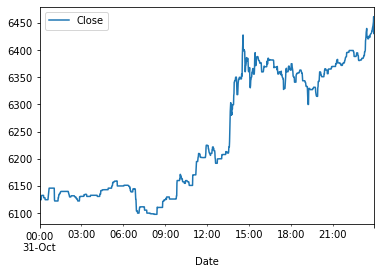

In [20]:
# Fluctuations on hourly basis for 1 day
df_bitcoin.plot(x = 'Date', y='Close', kind = 'line')

In [ ]:
# # Extract hour and min from string value in Date column -- # Tweets data from  Oct 31

# df_bitcoin['Minute'] = (df_bitcoin.Date.str.slice(11,13) + df_bitcoin.Date.str.slice(14,16))
# df_bitcoin

In [21]:
df_bitcoin['Percent_change'] = df_bitcoin.Close.pct_change(periods = 1)
df_bitcoin

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume,Percent_change
1198578,1509408000,2017-10-31 00:00:00,BTCUSD,6124.69,6124.69,6124.68,6124.68,0.134906,NaN
1198577,1509408060,2017-10-31 00:01:00,BTCUSD,6124.68,6124.69,6124.68,6124.68,1.223548,0.000000
1198576,1509408120,2017-10-31 00:02:00,BTCUSD,6124.68,6124.69,6124.68,6124.69,3.294787,0.000002
1198575,1509408180,2017-10-31 00:03:00,BTCUSD,6124.69,6124.69,6124.68,6124.68,0.110868,-0.000002
1198574,1509408240,2017-10-31 00:04:00,BTCUSD,6124.68,6124.69,6124.68,6124.69,0.087178,0.000002
...,...,...,...,...,...,...,...,...,...
1197144,1509494040,2017-10-31 23:54:00,BTCUSD,6448.76,6452.00,6448.76,6452.00,45.083393,0.000502
1197143,1509494100,2017-10-31 23:55:00,BTCUSD,6452.00,6467.32,6452.00,6461.74,14.489499,0.001510
1197142,1509494160,2017-10-31 23:56:00,BTCUSD,6461.74,6461.74,6436.77,6436.77,15.086557,-0.003864
1197141,1509494220,2017-10-31 23:57:00,BTCUSD,6436.77,6436.77,6430.00,6430.00,3.881654,-0.001052


In [22]:
# df_bitcoin['MA'] = df_bitcoin['Close']
# df_bitcoin['Increase'] = df_bitcoin.MA.rolling(window = 3).mean()
df_bitcoin['Increase'] = df_bitcoin.Percent_change.apply((lambda x: 1 if x > 0 else 0))
df_bitcoin
# df.rolling(window=5)['MA'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume,Percent_change,Increase
1198578,1509408000,2017-10-31 00:00:00,BTCUSD,6124.69,6124.69,6124.68,6124.68,0.134906,NaN,0
1198577,1509408060,2017-10-31 00:01:00,BTCUSD,6124.68,6124.69,6124.68,6124.68,1.223548,0.000000,0
1198576,1509408120,2017-10-31 00:02:00,BTCUSD,6124.68,6124.69,6124.68,6124.69,3.294787,0.000002,1
1198575,1509408180,2017-10-31 00:03:00,BTCUSD,6124.69,6124.69,6124.68,6124.68,0.110868,-0.000002,0
1198574,1509408240,2017-10-31 00:04:00,BTCUSD,6124.68,6124.69,6124.68,6124.69,0.087178,0.000002,1
...,...,...,...,...,...,...,...,...,...,...
1197144,1509494040,2017-10-31 23:54:00,BTCUSD,6448.76,6452.00,6448.76,6452.00,45.083393,0.000502,1
1197143,1509494100,2017-10-31 23:55:00,BTCUSD,6452.00,6467.32,6452.00,6461.74,14.489499,0.001510,1
1197142,1509494160,2017-10-31 23:56:00,BTCUSD,6461.74,6461.74,6436.77,6436.77,15.086557,-0.003864,0
1197141,1509494220,2017-10-31 23:57:00,BTCUSD,6436.77,6436.77,6430.00,6430.00,3.881654,-0.001052,0


In [23]:
x = df_final_new['Score']
y = df_bitcoin['Increase']

In [24]:
print(len(x))
print(len(y))

1438
1438


In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# sc = MinMaxScaler(feature_range = (0, 1))
# # x = sc.fit_transform(x)
# y = sc.fit_transform(y)

In [32]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

neurons = 10
input_dim = 1

batch_size = 32
num_epochs = 15

model = Sequential()
model.add(Dense(neurons, input_dim = input_dim, activation = 'relu'))
model.add(Dense(neurons, activation = 'relu'))
model.add(Dense(1))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                20        
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.fit(x_train, y_train, epochs = num_epochs, batch_size = batch_size, shuffle = True, verbose = 1, validation_split = 0.15)

Epoch 1/15
31/31 [==============================] - 0s 7ms/step - loss: 0.6489 - accuracy: 0.6960 - val_loss: 0.7110 - val_accuracy: 0.6821
Epoch 2/15
31/31 [==============================] - 0s 5ms/step - loss: 0.6443 - accuracy: 0.6960 - val_loss: 0.7065 - val_accuracy: 0.6821
Epoch 3/15
31/31 [==============================] - 0s 6ms/step - loss: 0.6400 - accuracy: 0.6970 - val_loss: 0.6951 - val_accuracy: 0.6821
Epoch 4/15
31/31 [==============================] - 0s 6ms/step - loss: 0.6367 - accuracy: 0.6991 - val_loss: 0.6908 - val_accuracy: 0.6821
Epoch 5/15
31/31 [==============================] - 0s 5ms/step - loss: 0.6334 - accuracy: 0.7021 - val_loss: 0.6839 - val_accuracy: 0.6763
Epoch 6/15
31/31 [==============================] - 0s 6ms/step - loss: 0.6319 - accuracy: 0.6981 - val_loss: 0.6800 - val_accuracy: 0.6763
Epoch 7/15
31/31 [==============================] - 0s 5ms/step - loss: 0.6294 - accuracy: 0.6960 - val_loss: 0.6755 - val_accuracy: 0.6763
Epoch 8/15
31/31 [==

In [34]:
model.evaluate(x_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 0.6481 - accuracy: 0.6806


[0.6481195092201233, 0.6805555820465088]

In [ ]:
#### We will try another model, where we will encode all tweets into sentence embeddings using pre-trained transformer model
#### And let the model figure out the stock price increase or decrease

In [35]:
df_final

,Unnamed: 0,Date,Tweet,Date_new,Minute,Sentiment,Prob,Score
0,845140,Tue Oct 31 00:00:33 EDT 2017,bitcoin cash cheapest on cryptopia btc market ...,2017-10-31 00:00:33,0,0,0.814125,0.000000
1,845139,Tue Oct 31 00:00:34 EDT 2017,wall street hedge funds rush to cryptocurrenci...,2017-10-31 00:00:34,0,0,0.720478,0.000000
2,845138,Tue Oct 31 00:00:35 EDT 2017,bitcoin value,2017-10-31 00:00:35,0,0,0.595345,0.000000
3,845137,Tue Oct 31 00:00:35 EDT 2017,the price of bitcoin on is now usd,2017-10-31 00:00:35,0,0,0.853079,0.000000
4,845136,Tue Oct 31 00:00:36 EDT 2017,current prices waves waves btc waves wavesplat...,2017-10-31 00:00:36,0,0,0.742298,0.000000
...,...,...,...,...,...,...,...,...
63407,781733,Tue Oct 31 23:58:34 EDT 2017,rt bitcoin's mysterious creator appears to be ...,2017-10-31 23:58:34,2358,0,0.627230,0.000000
63408,781732,Tue Oct 31 23:58:36 EDT 2017,rt com bitcoin facts may bitcoin firstbitcoin ...,2017-10-31 23:58:36,2358,0,0.854242,0.000000
63409,781731,Tue Oct 31 23:58:47 EDT 2017,rt cryptics crowdsale bitcoin ico btc usd eth ...,2017-10-31 23:58:47,2358,0,0.811618,0.000000
63410,781730,Tue Oct 31 23:58:49 EDT 2017,rt com new logo soon available blunner blockch...,2017-10-31 23:58:49,2358,0,0.851398,0.000000


In [39]:
df_final_new1 = df_final.groupby(['Minute'], sort = False)['Tweet'].apply(lambda x: ''.join(str(x))).reset_index()
df_final_new1

,Minute,Tweet
0,0,0 bitcoin cash cheapest on cryptopia btc m...
1,1,19 current bitcoin pric...
2,2,58 rt participate in the dalecoin second ro...
3,3,78 rt what is bitconnect quick start guide...
4,4,106 marketalert last top price change avg o...
...,...,...
1434,2354,63286 rt ah the joys of iot tech insurtech ...
1435,2355,63312 after listening recent video about bi...
1436,2356,63344 rt why buy bitcoin has three reaso...
1437,2357,63368 cme launching bitcoin futures in to g...


In [42]:
pip install -U sentence-transformers

     |████████████████████████████████| 78 kB 3.5 MB/s 
     |████████████████████████████████| 3.3 MB 11.3 MB/s 
     |████████████████████████████████| 3.3 MB 39.0 MB/s 
     |████████████████████████████████| 1.2 MB 34.2 MB/s 
     |████████████████████████████████| 61 kB 494 kB/s 
     |████████████████████████████████| 895 kB 37.5 MB/s 
     |████████████████████████████████| 596 kB 47.1 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=2216f213d5b808998eccfcba4268de00a9d6a62ddd6f740c8ea16b9fa2ce37b4
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [65]:
# from sentence_transformers import SentenceTransformer

model1 = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')

In [66]:
sentences = ["This is an example sentence", "Each sentence is converted"]

embeddings = model1.encode(sentences)
print(embeddings)

[[ 0.02250266 -0.07829175 -0.02303068 ... -0.00827927  0.02652687
  -0.00201896]
 [ 0.04170237  0.00109741 -0.01553419 ... -0.02181634 -0.06359357
  -0.00875289]]


In [47]:
len(embeddings[0])

768

In [67]:
df_final_new1['Embeddings'] = df_final_new1['Tweet'].apply(lambda x: np.array(model1.encode(x), dtype='float32'))
df_final_new1

,Minute,Tweet,Embeddings
0,0,0 bitcoin cash cheapest on cryptopia btc m...,"[0.008436572, -0.004427272, -0.053723972, -0.0..."
1,1,19 current bitcoin pric...,"[0.023610346, 0.025879653, -0.04283282, -0.018..."
2,2,58 rt participate in the dalecoin second ro...,"[0.06072863, 0.09740809, -0.024955517, 0.02065..."
3,3,78 rt what is bitconnect quick start guide...,"[0.05378692, 0.006639876, -0.04445255, -0.0174..."
4,4,106 marketalert last top price change avg o...,"[0.051718783, 0.04086336, -0.022214163, -0.014..."
...,...,...,...
1434,2354,63286 rt ah the joys of iot tech insurtech ...,"[0.025410248, 0.0709928, -0.03154773, 0.024084..."
1435,2355,63312 after listening recent video about bi...,"[0.0135710575, 0.029223004, -0.029551325, 0.01..."
1436,2356,63344 rt why buy bitcoin has three reaso...,"[0.012482006, 0.10186273, -0.037526134, -0.000..."
1437,2357,63368 cme launching bitcoin futures in to g...,"[0.030248713, 0.08788385, -0.027662665, -0.026..."


In [74]:
xx = df_final_new1['Embeddings'].tolist()
yy = df_bitcoin['Increase'].tolist()

In [75]:
print(len(xx))
print(len(yy))

1439
1439


In [76]:
from sklearn.model_selection import train_test_split

xx_train, xx_test, yy_train, yy_test = train_test_split(xx,yy,test_size = 0.2)

In [77]:
import numpy as np
xx_train1 = np.array(xx_train , dtype='float32')
xx_test1 = np.array(xx_test, dtype='float32')
yy_train1 = np.array(yy_train, dtype='float32')
yy_test1 = np.array(yy_test, dtype='float32')

In [78]:
type(xx_train1)
type(yy_train1)

numpy.ndarray

In [83]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

input_dim = len(xx_train1[0])

batch_size = 32
num_epochs = 15

model = Sequential()
model.add(Dense(10, input_dim = input_dim, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                7690      
                                                                 
 dense_12 (Dense)            (None, 10)                110       
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 7,811
Trainable params: 7,811
Non-trainable params: 0
_________________________________________________________________


In [84]:
model.fit(xx_train1, yy_train1, epochs = num_epochs, batch_size = batch_size, shuffle = True, verbose = 1, validation_split = 0.15)

Epoch 1/15
31/31 [==============================] - 1s 11ms/step - loss: 0.6495 - accuracy: 0.7035 - val_loss: 0.6081 - val_accuracy: 0.6936
Epoch 2/15
31/31 [==============================] - 0s 5ms/step - loss: 0.6036 - accuracy: 0.7055 - val_loss: 0.6149 - val_accuracy: 0.6936
Epoch 3/15
31/31 [==============================] - 0s 6ms/step - loss: 0.5985 - accuracy: 0.7055 - val_loss: 0.6169 - val_accuracy: 0.6936
Epoch 4/15
31/31 [==============================] - 0s 5ms/step - loss: 0.5988 - accuracy: 0.7055 - val_loss: 0.6122 - val_accuracy: 0.6936
Epoch 5/15
31/31 [==============================] - 0s 6ms/step - loss: 0.5894 - accuracy: 0.7055 - val_loss: 0.6280 - val_accuracy: 0.6936
Epoch 6/15
31/31 [==============================] - 0s 6ms/step - loss: 0.5928 - accuracy: 0.7055 - val_loss: 0.6139 - val_accuracy: 0.6936
Epoch 7/15
31/31 [==============================] - 0s 5ms/step - loss: 0.5841 - accuracy: 0.7055 - val_loss: 0.6153 - val_accuracy: 0.6936
Epoch 8/15
31/31 [=

In [85]:
model.evaluate(xx_test1, yy_test1)

9/9 [==============================] - 0s 3ms/step - loss: 0.7343 - accuracy: 0.6562


[0.7343328595161438, 0.65625]

In [ ]:
#### Using 50 nodes in dense layer

In [86]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

input_dim = len(xx_train1[0])

batch_size = 32
num_epochs = 15

model = Sequential()
model.add(Dense(50, input_dim = input_dim, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(1))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 50)                38450     
                                                                 
 dense_15 (Dense)            (None, 50)                2550      
                                                                 
 dense_16 (Dense)            (None, 1)                 51        
                                                                 
Total params: 41,051
Trainable params: 41,051
Non-trainable params: 0
_________________________________________________________________


In [87]:
model.fit(xx_train1, yy_train1, epochs = num_epochs, batch_size = batch_size, shuffle = True, verbose = 1, validation_split = 0.15)

Epoch 1/15
31/31 [==============================] - 1s 11ms/step - loss: 0.6417 - accuracy: 0.6687 - val_loss: 0.6334 - val_accuracy: 0.6936
Epoch 2/15
31/31 [==============================] - 0s 5ms/step - loss: 0.5991 - accuracy: 0.7055 - val_loss: 0.6149 - val_accuracy: 0.6936
Epoch 3/15
31/31 [==============================] - 0s 6ms/step - loss: 0.5946 - accuracy: 0.7055 - val_loss: 0.6196 - val_accuracy: 0.6936
Epoch 4/15
31/31 [==============================] - 0s 5ms/step - loss: 0.5901 - accuracy: 0.7055 - val_loss: 0.6171 - val_accuracy: 0.6936
Epoch 5/15
31/31 [==============================] - 0s 6ms/step - loss: 0.5745 - accuracy: 0.7055 - val_loss: 0.6209 - val_accuracy: 0.6936
Epoch 6/15
31/31 [==============================] - 0s 5ms/step - loss: 0.5744 - accuracy: 0.7157 - val_loss: 0.6469 - val_accuracy: 0.6936
Epoch 7/15
31/31 [==============================] - 0s 5ms/step - loss: 0.5577 - accuracy: 0.7117 - val_loss: 0.6368 - val_accuracy: 0.6936
Epoch 8/15
31/31 [=

In [88]:
model.evaluate(xx_test1, yy_test1)

9/9 [==============================] - 0s 4ms/step - loss: 0.8180 - accuracy: 0.6181


[0.8179500102996826, 0.6180555820465088]

In [ ]:
#### Using 100 nodes in dense layer

In [98]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

input_dim = len(xx_train1[0])

batch_size = 32
num_epochs = 15

model = Sequential()
model.add(Dense(100, input_dim = input_dim, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(1))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 100)               76900     
                                                                 
 dense_27 (Dense)            (None, 100)               10100     
                                                                 
 dense_28 (Dense)            (None, 1)                 101       
                                                                 
Total params: 87,101
Trainable params: 87,101
Non-trainable params: 0
_________________________________________________________________


In [99]:
model.fit(xx_train1, yy_train1, epochs = num_epochs, batch_size = batch_size, shuffle = True, verbose = 1, validation_split = 0.15)

Epoch 1/15
31/31 [==============================] - 1s 12ms/step - loss: 0.6860 - accuracy: 0.7055 - val_loss: 0.6160 - val_accuracy: 0.6936
Epoch 2/15
31/31 [==============================] - 0s 5ms/step - loss: 0.6063 - accuracy: 0.7055 - val_loss: 0.6150 - val_accuracy: 0.6936
Epoch 3/15
31/31 [==============================] - 0s 5ms/step - loss: 0.5982 - accuracy: 0.7055 - val_loss: 0.6138 - val_accuracy: 0.6936
Epoch 4/15
31/31 [==============================] - 0s 6ms/step - loss: 0.5888 - accuracy: 0.7055 - val_loss: 0.6203 - val_accuracy: 0.6936
Epoch 5/15
31/31 [==============================] - 0s 5ms/step - loss: 0.5854 - accuracy: 0.7055 - val_loss: 0.6168 - val_accuracy: 0.6936
Epoch 6/15
31/31 [==============================] - 0s 6ms/step - loss: 0.5668 - accuracy: 0.7065 - val_loss: 0.6202 - val_accuracy: 0.6936
Epoch 7/15
31/31 [==============================] - 0s 6ms/step - loss: 0.5546 - accuracy: 0.7198 - val_loss: 0.6262 - val_accuracy: 0.7052
Epoch 8/15
31/31 [=

In [100]:
model.evaluate(xx_test1, yy_test1)

9/9 [==============================] - 0s 4ms/step - loss: 1.0676 - accuracy: 0.6215


[1.067562460899353, 0.6215277910232544]

In [ ]:
#### Using 400 nodes in dense layer with dropout

In [92]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

input_dim = len(xx_train1[0])

batch_size = 32
num_epochs = 15

model = Sequential()
model.add(Dense(400, input_dim = input_dim, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(400, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 400)               307600    
                                                                 
 dropout (Dropout)           (None, 400)               0         
                                                                 
 dense_21 (Dense)            (None, 400)               160400    
                                                                 
 dropout_1 (Dropout)         (None, 400)               0         
                                                                 
 dense_22 (Dense)            (None, 1)                 401       
                                                                 
Total params: 468,401
Trainable params: 468,401
Non-trainable params: 0
_________________________________________________________________


In [93]:
model.fit(xx_train1, yy_train1, epochs = num_epochs, batch_size = batch_size, shuffle = True, verbose = 1, validation_split = 0.15)

Epoch 1/15
31/31 [==============================] - 1s 11ms/step - loss: 4.5423 - accuracy: 0.7055 - val_loss: 4.7256 - val_accuracy: 0.6936
Epoch 2/15
31/31 [==============================] - 0s 6ms/step - loss: 4.5423 - accuracy: 0.7055 - val_loss: 4.7256 - val_accuracy: 0.6936
Epoch 3/15
31/31 [==============================] - 0s 6ms/step - loss: 4.5423 - accuracy: 0.7055 - val_loss: 4.7256 - val_accuracy: 0.6936
Epoch 4/15
31/31 [==============================] - 0s 7ms/step - loss: 4.5423 - accuracy: 0.7055 - val_loss: 4.7256 - val_accuracy: 0.6936
Epoch 5/15
31/31 [==============================] - 0s 6ms/step - loss: 4.5423 - accuracy: 0.7055 - val_loss: 4.7256 - val_accuracy: 0.6936
Epoch 6/15
31/31 [==============================] - 0s 6ms/step - loss: 4.5423 - accuracy: 0.7055 - val_loss: 4.7256 - val_accuracy: 0.6936
Epoch 7/15
31/31 [==============================] - 0s 5ms/step - loss: 4.5423 - accuracy: 0.7055 - val_loss: 4.7256 - val_accuracy: 0.6936
Epoch 8/15
31/31 [=

In [94]:
model.evaluate(xx_test1, yy_test1)

9/9 [==============================] - 0s 4ms/step - loss: 5.3559 - accuracy: 0.6528


[5.355885028839111, 0.6527777910232544]

In [ ]:
######       Models                                      Accuracy
######       Model with Sentiment score                       68%
######       Model with Embeddings - 10 nodes                 65%
######       Model with Embeddings - 50 nodes                 61%
######       Model with Embeddings - 100 nodes                62%
######       Model with Embeddings - 400 nodes with dropout   62%

In [ ]:
# Improvements: 
# More data could improve the model
# Information from other sources - financial news
# Consider correlation with other stock prices
# Consider other stock prices in input
# Use improved sentiment model
# Consider smaller time stamps - minite/30 mins/6 hour/12 hour/24 hour
# Take into consideration other crypto currency prices
# Consider moving averages column